# Image Classification Project: Cats vs Dogs
##### Author - Aryan Singla

## Introduction
In this project, we aim to build a deep learning model to classify images as either cats or dogs. This task is a classic problem in the field of computer vision and serves as a fundamental introduction to image classification techniques. We will utilize a dataset obtained from Kaggle, consisting of thousands of images of cats and dogs, to train and evaluate our model.

## Dataset
The dataset used in this project is sourced from Kaggle's "Dogs vs Cats" competition. It comprises a large collection of images of cats and dogs. Each image is labeled with the corresponding class, allowing us to perform supervised learning. The dataset is divided into training and testing sets, enabling us to train our model on labeled data and evaluate its performance on unseen data.

## Methodology
1. **Data Preprocessing**: We will preprocess the images, including resizing, normalization, and augmentation techniques to enhance the model's generalization capabilities.
2. **Model Architecture**: We will explore various deep learning architectures, such as Convolutional Neural Networks (CNNs), to build our image classification model. Experimentation with different architectures and hyperparameters will be conducted to achieve the best performance.
3. **Training**: The model will be trained on the training dataset using an appropriate optimization algorithm and loss function.
4. **Evaluation**: We will evaluate the trained model's performance on the testing dataset using metrics such as accuracy.
5. **Fine-tuning**: Further improvements may involve fine-tuning the model, adjusting hyperparameters, or incorporating advanced techniques like transfer learning to enhance performance.

## Results
We will present the results of our experiments, including the model's accuracy and visualizations of performance metrics. Additionally, we may showcase some predictions made by the model on unseen images.

## Conclusion
In conclusion, this project demonstrates the process of building an image classification model to distinguish between cats and dogs using deep learning techniques. Through experimentation and optimization, we aim to achieve a reliable and accurate classifier that can generalize well to unseen data.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
train_dir = r'/content/drive/MyDrive/Colab_Notebooks/Data/train'
validation_dir = '/content/drive/MyDrive/Colab_Notebooks/Data/validation'
test_dir ='/content/drive/MyDrive/Colab_Notebooks/Data/test'

In [ ]:
train_dir

'/content/drive/MyDrive/Colab_Notebooks/Data/train'

### Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [6]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [10]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [11]:
history = model.fit (
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 368s 4s/step - loss: 0.6908 - acc: 0.5220 - val_loss: 0.6877 - val_acc: 0.5350
Epoch 2/20
100/100 [==============================] - 15s 149ms/step - loss: 0.6771 - acc: 0.5645 - val_loss: 0.6641 - val_acc: 0.5840
Epoch 3/20
100/100 [==============================] - 15s 152ms/step - loss: 0.6564 - acc: 0.6040 - val_loss: 0.6510 - val_acc: 0.6000
Epoch 4/20
100/100 [==============================] - 15s 153ms/step - loss: 0.6314 - acc: 0.6395 - val_loss: 0.6290 - val_acc: 0.6340
Epoch 5/20
100/100 [==============================] - 15s 152ms/step - loss: 0.6026 - acc: 0.6700 - val_loss: 0.6301 - val_acc: 0.6390
Epoch 6/20
100/100 [==============================] - 15s 150ms/step - loss: 0.5747 - acc: 0.6950 - val_loss: 0.6149 - val_acc: 0.6500
Epoch 7/20
100/100 [==============================] - 15s 150ms/step - loss: 0.5564 - acc: 0.7080 - val_loss: 0.6190 - val_acc: 0.6540
Epoch 8/20
100/100 [==============================] - 15s

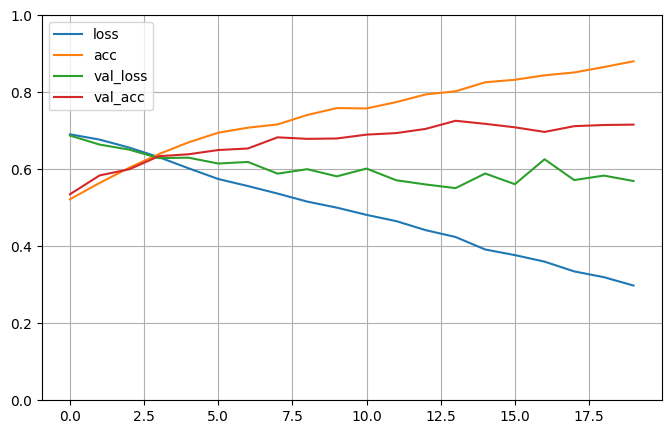

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Here , we can see that there is a huge gap between validation_accuracy and training_accuracy which shows that our model is overfitting and is not suitable, so we apply data augmentaion to create more samples by rotating the image and other different techniques.

In [13]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
from tensorflow.keras import backend as K

K.clear_session()
del model

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 25s 189ms/step - loss: 0.6989 - acc: 0.5238 - val_loss: 0.6878 - val_acc: 0.4888
Epoch 2/100
100/100 [==============================] - 19s 190ms/step - loss: 0.7081 - acc: 0.5606 - val_loss: 0.6924 - val_acc: 0.5013
Epoch 3/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6790 - acc: 0.5688 - val_loss: 0.6425 - val_acc: 0.6338
Epoch 4/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6792 - acc: 0.5700 - val_loss: 0.6471 - val_acc: 0.6450
Epoch 5/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6638 - acc: 0.6225 - val_loss: 0.6280 - val_acc: 0.6550
Epoch 6/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6388 - acc: 0.6306 - val_loss: 0.6180 - val_acc: 0.6475
Epoch 7/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6625 - acc: 0.6431 - val_loss: 0.6003 - val_acc: 0.6862
Epoch 8/100
100/100 [===========================

In [27]:
model.save("project_cnn.h5")

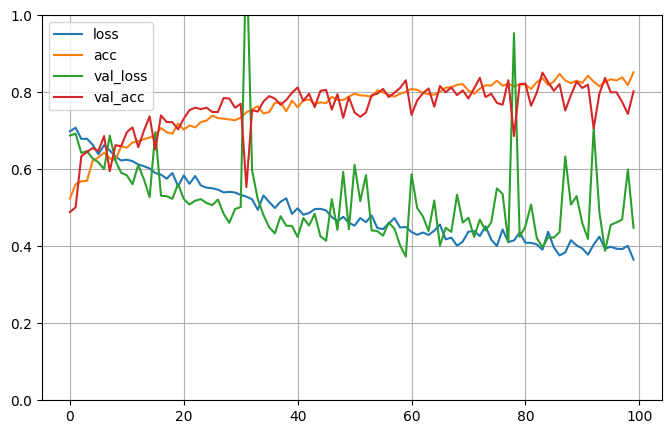

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
keras.backend.clear_session
del model

# VGG16

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [32]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# conv_base.trainable = False

In [36]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [37]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [38]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

Epoch 1/30
100/100 [==============================] - 180s 2s/step - loss: 248.8580 - acc: 0.4910 - val_loss: 0.6932 - val_acc: 0.5000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
100/100 [==============================] - 172s 2s/step - loss: 0.6933 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 172s 2s/step - loss: 0.6934 - acc: 0.4910 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 171s 2s/step - loss: 0.6935 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 171s 2s/step - loss: 0.6934 - acc: 0.4890 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 170s 2s/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/30
100/100 [==============================] - 170s 2s/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/30
100/100 [==============================] - 170s 2s/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 9/30
100/100 [==============================] - 169s 2s/step - 

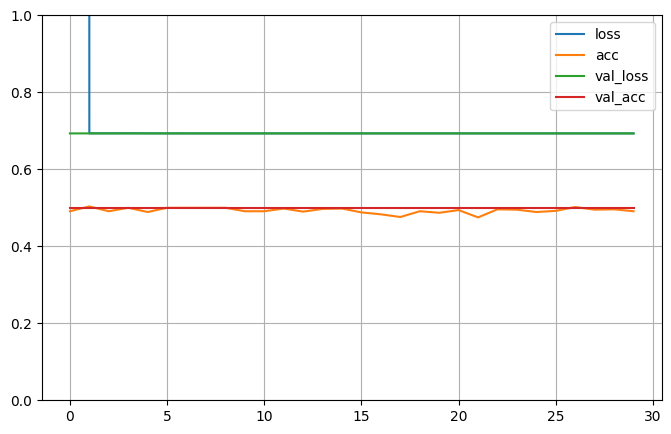

In [39]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
hist_df = pd.DataFrame(history.history)

In [41]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [42]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [43]:
model.evaluate(test_generator, steps=50)

50/50 [==============================] - 99s 2s/step - loss: 0.6931 - acc: 0.5000


[0.6931474804878235, 0.5]

## Results